## Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import tensorflow as tf


In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [6]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [7]:
df.shape

(768, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
min(df['Age']),max(df['Age'])

(21, 81)

In [12]:
age_intervals=pd.cut(df['Age'], bins=range(min(df['Age'])-1,max(df['Age'])+5,5), right=False)
age_counts=age_intervals.value_counts()
fig=go.Figure(data=[go.Pie(labels=age_counts.index.astype(str), values=age_counts.values)])
fig.update_layout(title_text='Distribution of Age')
fig.show()

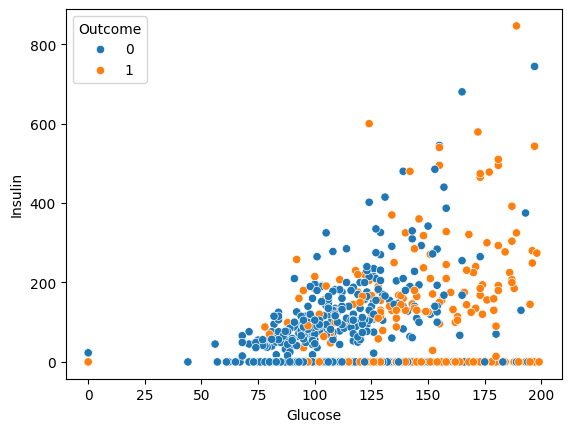

In [13]:
sns.scatterplot(df,x='Glucose',y='Insulin',hue='Outcome')
plt.show()

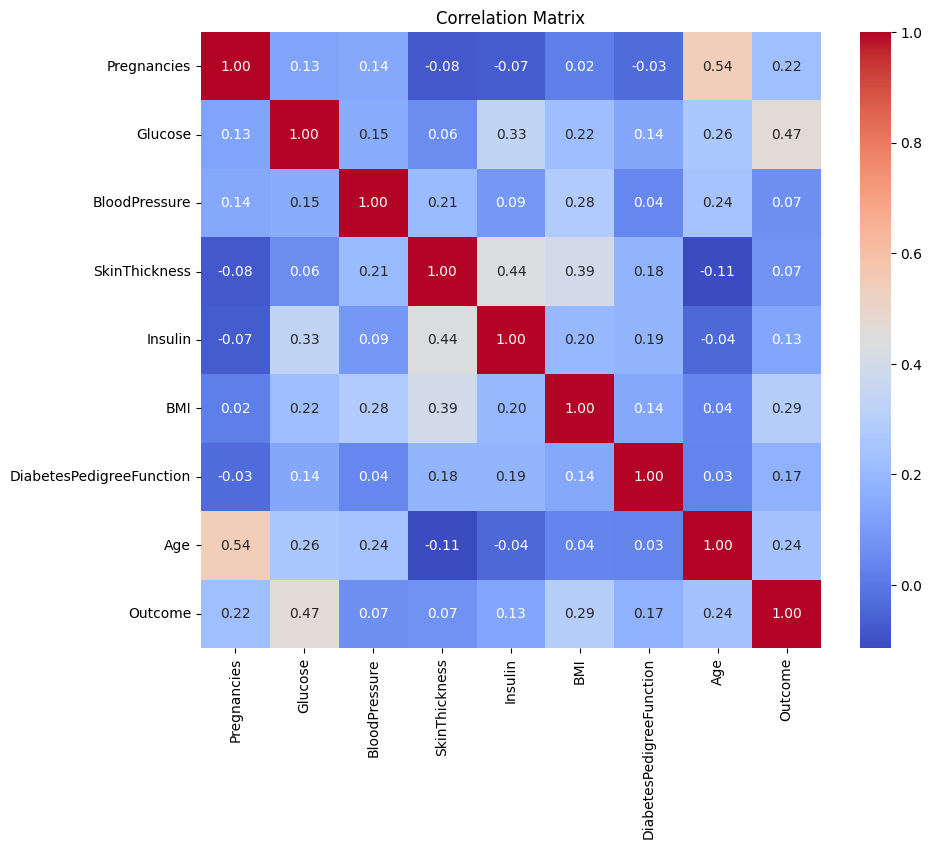

In [14]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

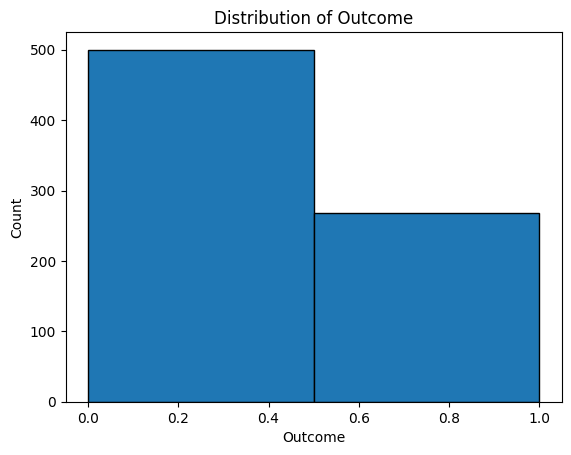

Outcome
0    500
1    268
Name: count, dtype: int64


In [15]:
plt.hist(df['Outcome'], bins=2, edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()
print(df['Outcome'].value_counts())

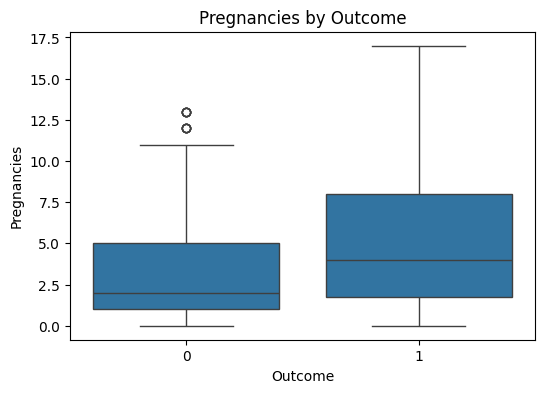

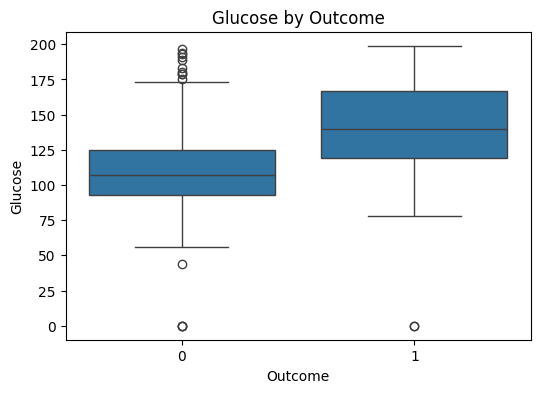

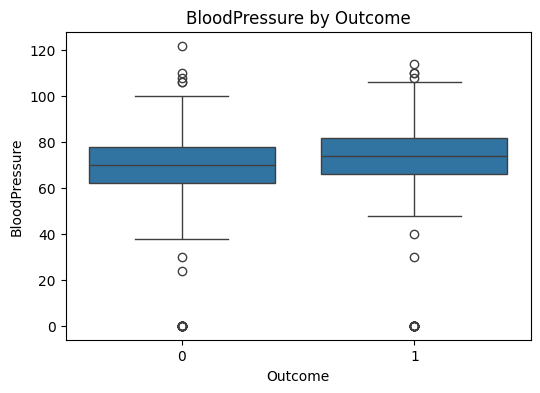

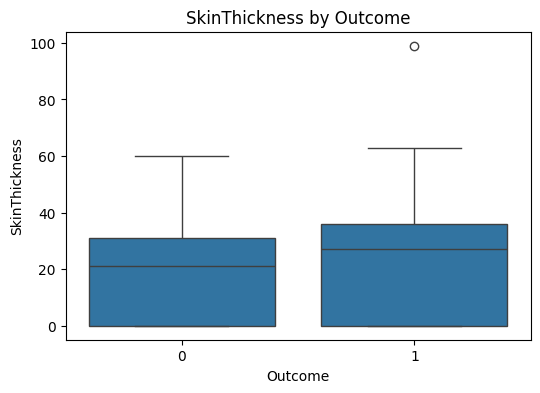

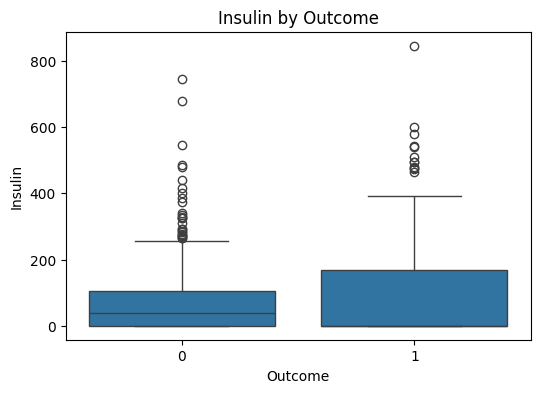

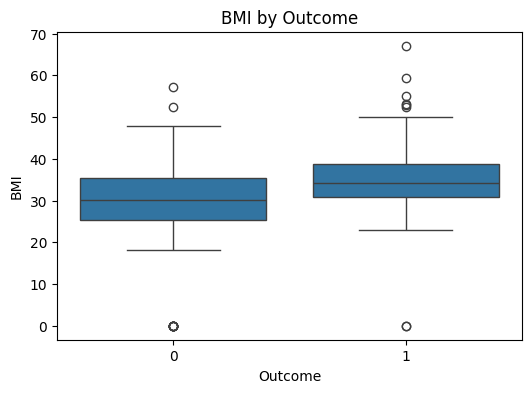

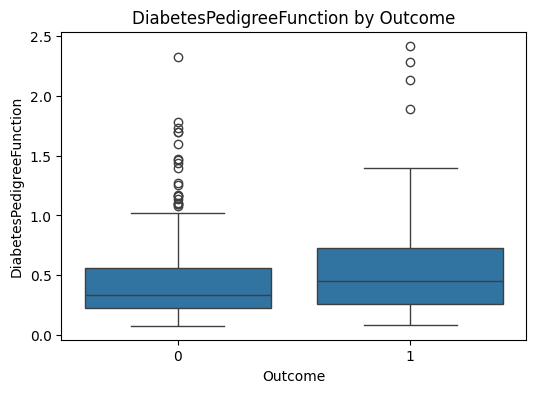

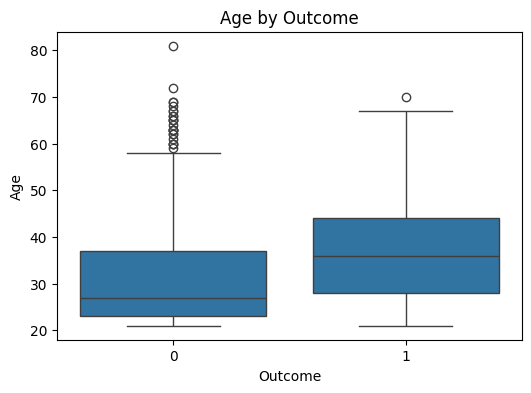

In [16]:
features = df.columns[:-1]  # Exclude the target variable 'Outcome'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Outcome')
    plt.show()

<Figure size 1200x800 with 0 Axes>

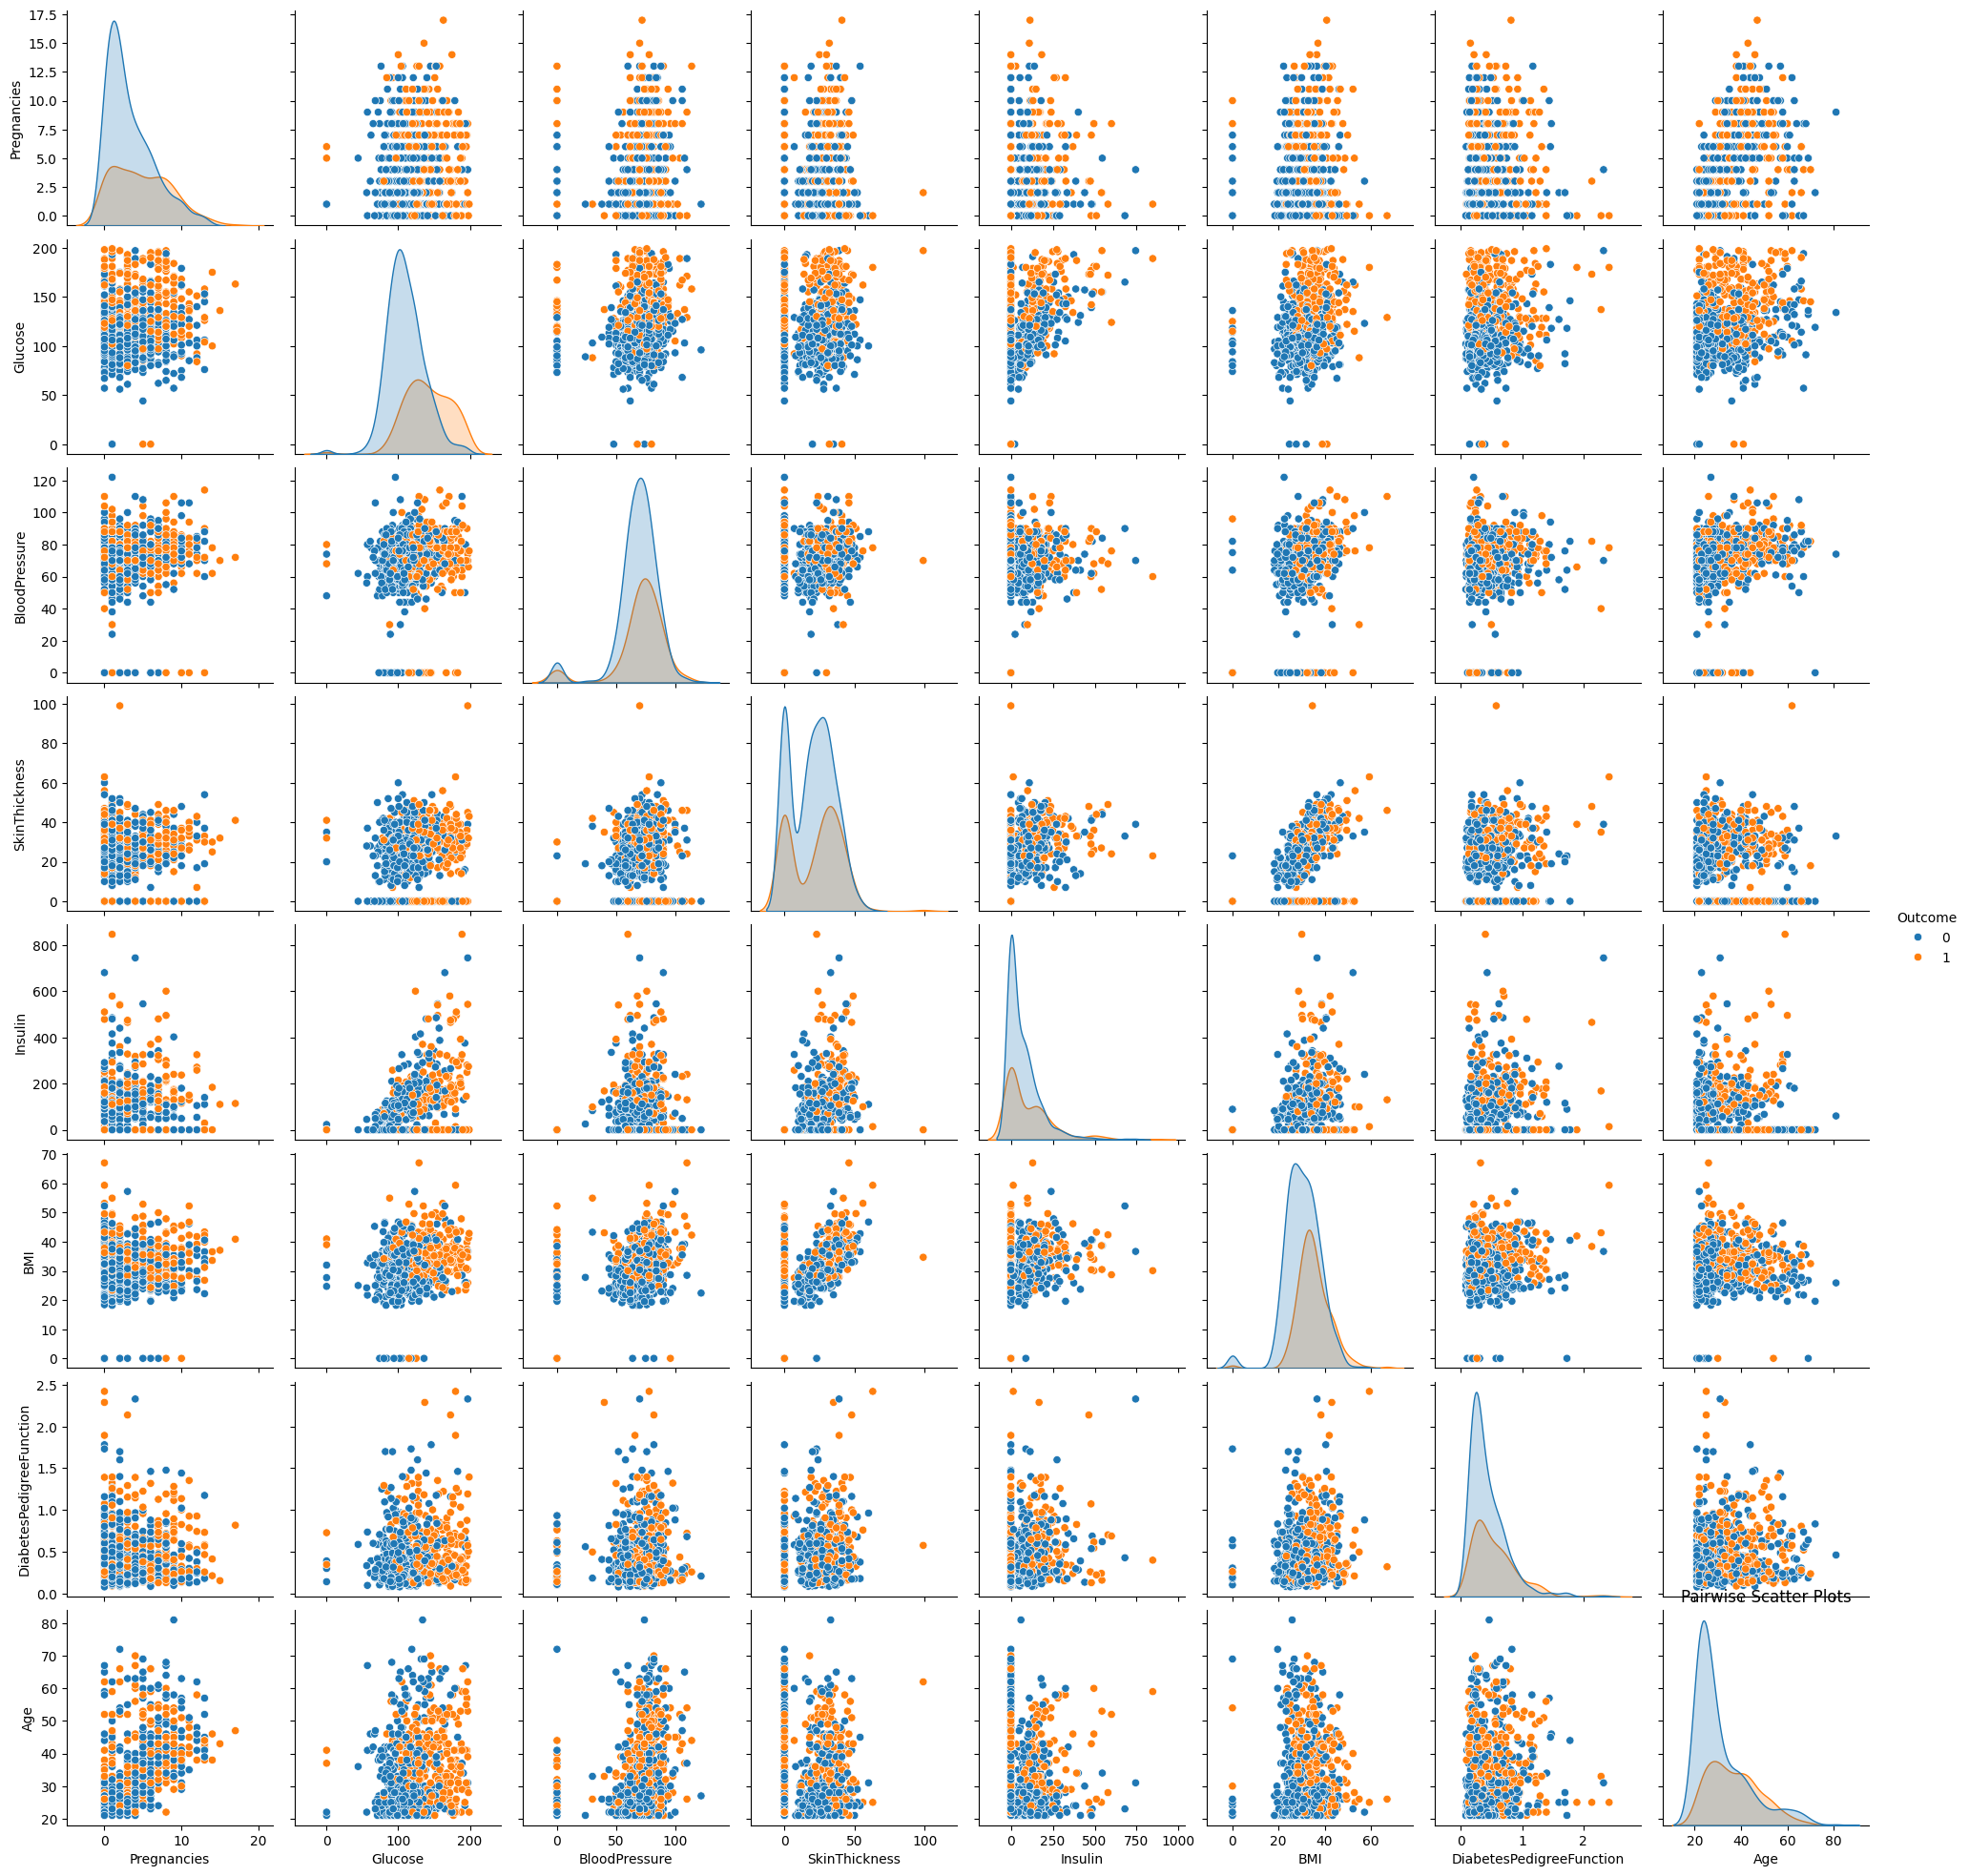

In [17]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Outcome')
plt.title('Pairwise Scatter Plots')
plt.show()


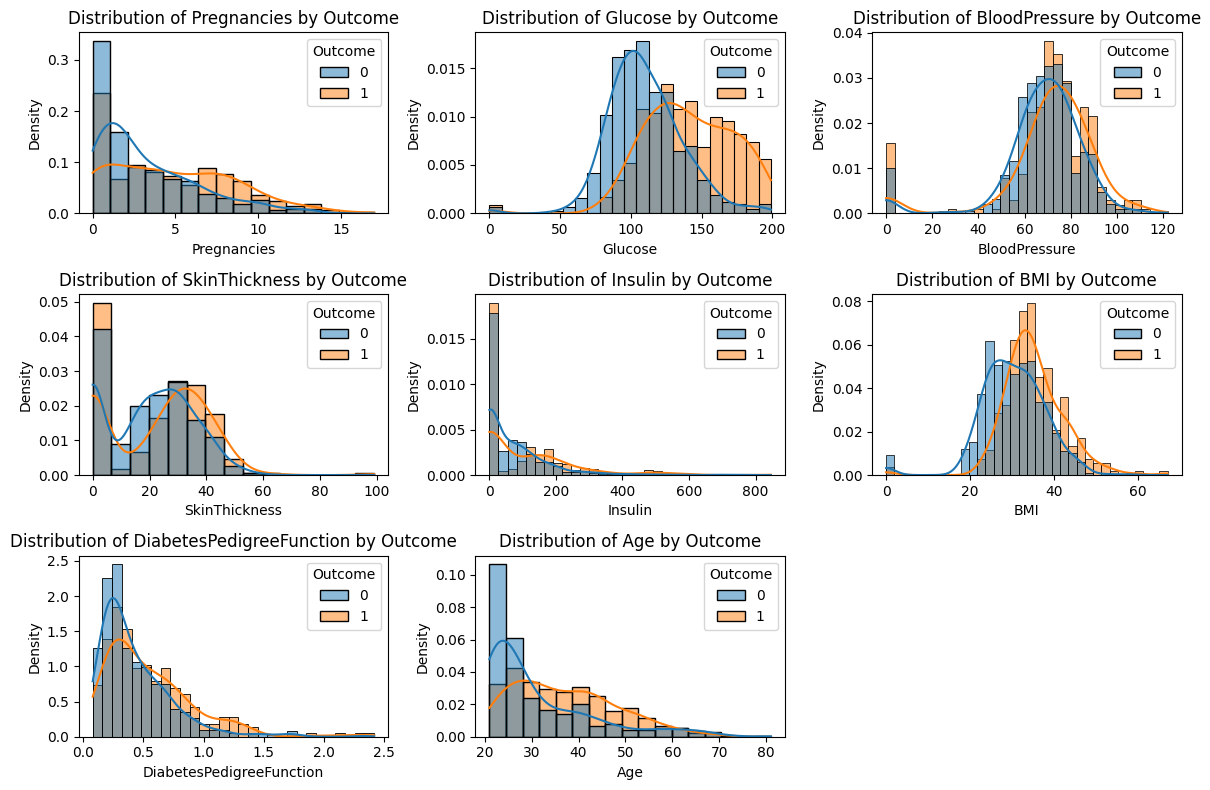

In [18]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df, x=feature, hue='Outcome', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()


## Splitting the dataset

In [19]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [20]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
early_stopping = EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True)

## ANN model

In [23]:
ann_model = Sequential()
ann_model.add(Dense(32,activation="relu",input_shape=(8,)))
ann_model.add(Dense(16,activation="relu"))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(4,activation="relu"))
ann_model.add(Dense(1,activation="sigmoid"))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889 (3.47 KB)

 Trainable params: 889 (3.47 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
ann_history=ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),callbacks=[early_stopping])

print('\nTraining accuracy: ',ann_history.history['acc'][-1],'\nValidation Accuracy: ',ann_history.history['val_acc'][-1])
ann_model.save('ann_model.h5')

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5998 - loss: 0.6915 - val_acc: 0.6688 - val_loss: 0.6727
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6766 - loss: 0.6610 - val_acc: 0.7208 - val_loss: 0.6337
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6985 - loss: 0.6099 - val_acc: 0.7338 - val_loss: 0.5945
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7438 - loss: 0.5576 - val_acc: 0.7338 - val_loss: 0.5682
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7130 - loss: 0.5384 - val_acc: 0.7597 - val_loss: 0.5454
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6997 - loss: 0.5373 - val_acc: 0.7597 - val_loss: 0.5282
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7098 - loss: 0.5292 - val_acc: 0.7727 - val_loss: 0.5200
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7652 - loss: 0.4663 - val_acc: 0.7727 - val_loss: 0.5164
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.757


Training accuracy:  0.7899022698402405 
Validation Accuracy:  0.7727272510528564


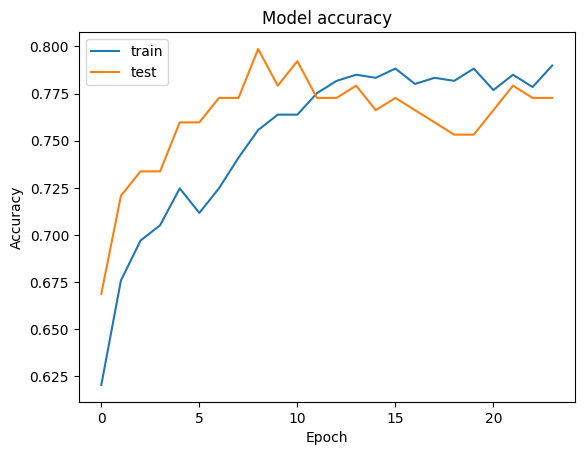

In [25]:
plt.plot(ann_history.history['acc'])
plt.plot(ann_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## LSTM model

In [26]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(8,1)))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(LSTM(16))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
lstm_history=lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),callbacks=[early_stopping])

print('\nTraining accuracy: ',lstm_history.history['acc'][-1],'\nValidation Accuracy: ',lstm_history.history['val_acc'][-1])
lstm_model.save('lstm_model.h5')

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.5829 - loss: 0.6797 - val_acc: 0.7403 - val_loss: 0.5971
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.6844 - loss: 0.5889 - val_acc: 0.7727 - val_loss: 0.5381
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.7111 - loss: 0.5438 - val_acc: 0.7403 - val_loss: 0.5358
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.7244 - loss: 0.5475 - val_acc: 0.7597 - val_loss: 0.5354
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7399 - loss: 0.5486 - val_acc: 0.7597 - val_loss: 0.5346
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7207 - loss: 0.5633 - val_acc: 0.7532 - val_loss: 0.5331
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7392 - loss: 0.5374 - val_acc: 0.7468 - val_loss: 0.5333
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7304 - loss: 0.5513 - val_acc: 0.7468 - val_loss: 0.5314
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - ac


Training accuracy:  0.7214983701705933 
Validation Accuracy:  0.7532467246055603


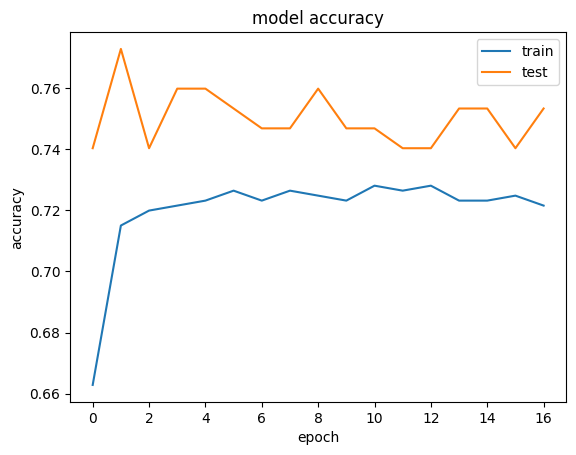

In [28]:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## RNN model

In [29]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(8,1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,337 (24.75 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
rnn_history=rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test),callbacks=[early_stopping])
print('\nTraining accuracy: ',rnn_history.history['acc'][-1],'\nValidation Accuracy: ',rnn_history.history['val_acc'][-1])
rnn_model.save('rnn_model.h5')

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.6730 - loss: 0.6036 - val_acc: 0.7208 - val_loss: 0.5085
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7555 - loss: 0.4999 - val_acc: 0.7792 - val_loss: 0.4919
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7865 - loss: 0.4418 - val_acc: 0.7727 - val_loss: 0.5056
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7797 - loss: 0.4590 - val_acc: 0.7727 - val_loss: 0.4986
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7692 - loss: 0.4547 - val_acc: 0.7597 - val_loss: 0.5238
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7932 - loss: 0.4555 - val_acc: 0.7532 - val_loss: 0.5152
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7932 - loss: 0.4504 - val_acc: 0.7727 - val_loss: 0.5119
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7612 - loss: 0.4559 - val_acc: 0.7597 - val_loss: 0.5068
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8066 - loss:


Training accuracy:  0.8013029098510742 
Validation Accuracy:  0.7727272510528564


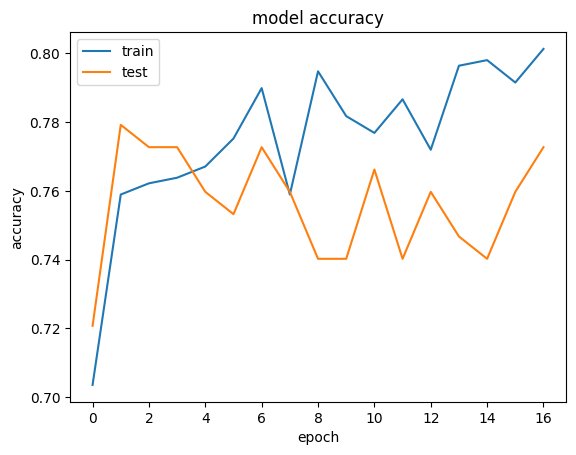

In [31]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Conclusion

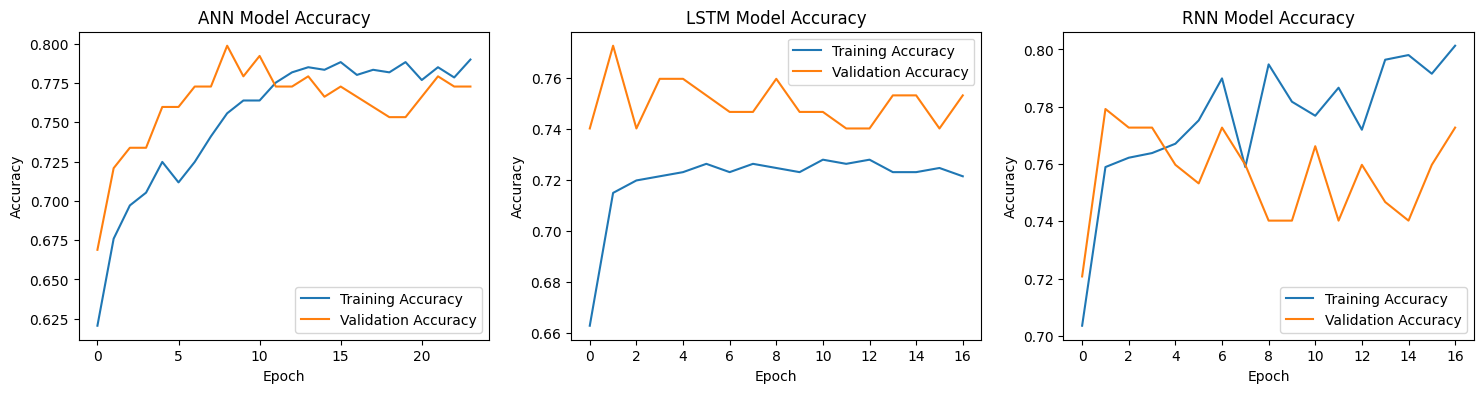

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ann_history.history['acc'], label='Training Accuracy')
axes[0].plot(ann_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('ANN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(lstm_history.history['acc'], label='Training Accuracy')
axes[1].plot(lstm_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('LSTM Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

axes[2].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[2].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[2].set_title('RNN Model Accuracy')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].legend(loc='best')

plt.show()


In [33]:
ann_pred=ann_model.evaluate(X_test,y_test)
lstm_pred=lstm_model.evaluate(X_test,y_test)
rnn_pred=rnn_model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7862 - loss: 0.5109 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7415 - loss: 0.5688
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7654 - loss: 0.5005 


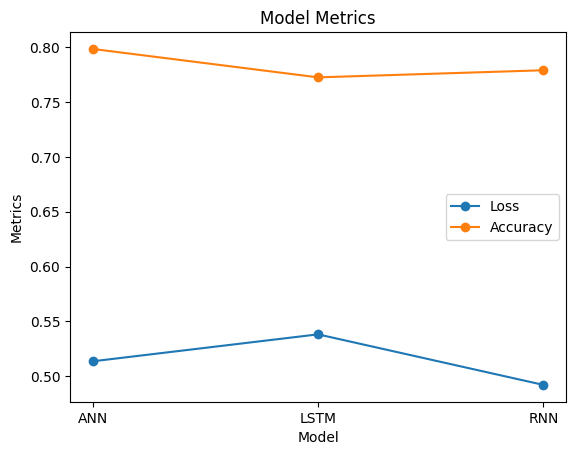

In [34]:
models=['ANN','LSTM','RNN']
plt.plot(models,[ann_pred[0],lstm_pred[0],rnn_pred[0]],marker= 'o',label='Loss')
plt.plot(models,[ann_pred[1],lstm_pred[1],rnn_pred[1]],marker= 'o',label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.legend(loc='best')
plt.show()

In [38]:
pregnancies = float(input("Enter number of pregnancies: "))
glucose = float(input("Enter Glucose Level: "))
bloodpressure = float(input("Enter Blood Pressure: "))
skinthickness = float(input("Enter Skin Thickness: "))
insulin = float(input("Enter Insulin Level: "))
bmi = float(input("Enter BMI: "))
dpf = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter Age: "))

new_data = [[pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, dpf, age]]
new_data_scaled = scaler.transform(new_data)

ann_pred = ann_model.predict(new_data_scaled)
lstm_pred = lstm_model.predict(new_data_scaled)
rnn_pred = rnn_model.predict(new_data_scaled)

print("ANN Prediction:", ann_pred[0])
print("LSTM Prediction:", lstm_pred[0])
print("RNN Prediction:", rnn_pred[0])


Enter number of pregnancies: 1
Enter Glucose Level: 134
Enter Blood Pressure: 140
Enter Skin Thickness: 40
Enter Insulin Level: 1
Enter BMI: 26
Enter Diabetes Pedigree Function: 0.267
Enter Age: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
ANN Prediction: [1.]
LSTM Prediction: [0.7099031]
RNN Prediction: [0.8552809]


In [37]:
# Load the model
model = tf.keras.models.load_model('ann_model.h5')
# Load the scaler
scaler = StandardScaler()
scaler.fit(X_train)
# Get user data
user_data = {
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
}
# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)
# Scale the user data
user_scaled = scaler.transform(user_df)
# Predict the outcome
prediction = model.predict(user_scaled)
# Print the prediction
if prediction[0] > 0.5:
    print('The user is predicted to have diabetes.')
else:
    print('The user is predicted to not have diabetes.')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The user is predicted to have diabetes.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

